# Diagnostic System

In [21]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import *
from rulebased_classifier import RuleBasedClassifier

In [22]:
with open("wdbc.pkl", "rb") as f: 
    data = pickle.load(f)

print(type(data)) 
print(data.shape)
data

<class 'pandas.core.frame.DataFrame'>
(569, 32)


,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='malignant'>

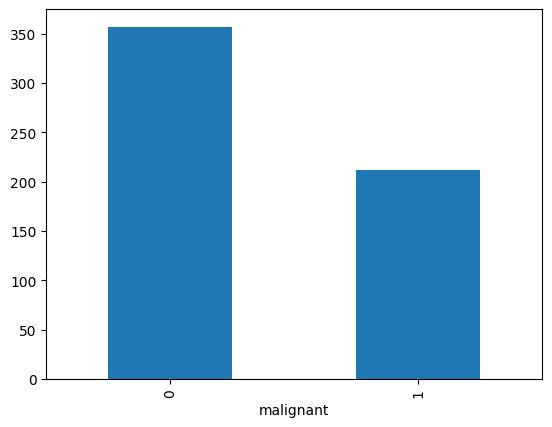

In [23]:
data['malignant'].value_counts().plot(kind='bar')

In [24]:
data.columns

Index(['id', 'malignant', 'radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0', 'radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2'],
      dtype='object')

Column description:

| **Feature**           | **What It Measures**           | **Normal Cell Behavior**   | **Cancerous Cell Behavior**   |
|----------------------|-----------------------------|--------------------------|-----------------------------|
| **Radius**           | Size of the nucleus         | Small, uniform          | Larger, irregular         |
| **Texture**         | Variation in brightness      | Smooth intensity        | High variability          |
| **Perimeter**       | Length of boundary          | Shorter, round shape    | Longer, irregular shape   |
| **Area**            | Total size                   | Smaller                 | Larger                    |
| **Smoothness**      | Edge uniformity             | Smooth                  | Irregular edges           |
| **Compactness**     | Shape density               | Dense, circular         | More stretched or jagged  |
| **Concavity**       | Depth of inward curves      | Few or none             | Deep indentations         |
| **Concave Points**  | Number of inward curves     | Few                     | Many                      |
| **Symmetry**        | Balance of shape            | Symmetrical             | Asymmetrical              |
| **Fractal Dimension** | Irregularity of edges     | Low                     | High                      |


Next we create a test set that we will not touch during all the process but only at the end to test the models:

In [25]:
data = data.drop(['id'], axis=1)
patient_X, patient_y = data.drop(['malignant'], axis=1), data['malignant']
patient_X, patient_X_test, patient_y, patient_y_test = train_test_split(patient_X, patient_y, test_size=0.1, random_state=42)

patient_df = pd.concat([patient_X, patient_y], axis=1)
patient_test = pd.concat([patient_X_test, patient_y_test], axis=1)

In [26]:
patient_df[patient_df['malignant'] == 1].describe()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,malignant
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0
mean,17.420872,21.572359,115.079128,975.335897,0.102842,0.145239,0.160762,0.087377,0.193436,0.062737,...,29.368769,140.954923,1417.431282,0.145154,0.376601,0.453310,0.182564,0.325534,0.091672,1.0
std,3.269915,3.797949,22.250138,376.680538,0.012760,0.054032,0.074483,0.033938,0.027937,0.007754,...,5.466704,29.856239,612.402699,0.022298,0.168342,0.179633,0.046398,0.076391,0.021871,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,1.0
25%,14.970000,19.270000,97.405000,691.900000,0.093940,0.110450,0.110850,0.063990,0.174900,0.056525,...,25.785000,118.250000,941.450000,0.131050,0.253500,0.331400,0.153800,0.279950,0.076285,1.0
50%,17.300000,21.430000,113.400000,930.900000,0.101800,0.133600,0.151900,0.086530,0.190700,0.061320,...,29.250000,136.800000,1302.000000,0.143500,0.358300,0.410700,0.182000,0.312600,0.088150,1.0
75%,19.590000,23.655000,129.950000,1204.500000,0.110950,0.169850,0.200550,0.101800,0.210100,0.067510,...,32.210000,158.800000,1702.500000,0.156250,0.448000,0.557050,0.210850,0.361300,0.102850,1.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,1.0


In [27]:
patient_df[patient_df['malignant'] == 0].describe()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,malignant
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0
mean,12.173842,17.894921,78.248265,465.089590,0.091880,0.079642,0.046449,0.025466,0.173081,0.062783,...,23.537098,87.291009,562.298423,0.124248,0.182676,0.168400,0.074579,0.269338,0.079526,0.0
std,1.793027,3.985937,11.894030,135.785508,0.013062,0.034333,0.044886,0.015716,0.024648,0.006781,...,5.513397,13.677011,165.936074,0.019966,0.092941,0.144188,0.036329,0.041295,0.014060,0.0
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,0.0
25%,11.080000,15.150000,70.870000,378.200000,0.082840,0.054920,0.020310,0.014730,0.157300,0.058350,...,19.590000,78.280000,450.000000,0.110100,0.110900,0.076980,0.050520,0.240400,0.070070,0.0
50%,12.220000,17.310000,78.290000,461.000000,0.090570,0.074280,0.037350,0.023430,0.170900,0.061440,...,22.800000,86.970000,549.100000,0.123400,0.167900,0.142300,0.074850,0.268100,0.077220,0.0
75%,13.450000,19.730000,86.240000,553.500000,0.100400,0.097130,0.059880,0.032510,0.187900,0.065740,...,26.510000,97.110000,674.700000,0.136300,0.231500,0.222000,0.098040,0.297700,0.085240,0.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,0.0


Looking to the statistics of each feature of the dataframe, it is easy to notice the differences among the subset of the benign and of the malignant. The feature of the malignant subset have higher means, therefore we could exploit this in building our rule based classifier in the next section

# CLASSIFICATION TASK

## Rule Based Classifier

In [28]:
from rulebased_classifier import RuleBasedClassifier

size = ['area', 'perimeter', 'radius']
shape = ['smoothness', 'compactness', 'concavity', 'concave points']
texture = ['texture']
homog = [ 'area', 'smoothness']

C = RuleBasedClassifier(size, shape, texture, homog, decision_option="all")
C.fit(patient_X, patient_y)
C.classifier_rules()

4 Category rules (in order):

Size:
 
	mean_area > 741.128828125
	mean_perimeter > 98.047817578125
	mean_radius > 14.986398046875

Shape:
 
	mean_smoothness > 0.11007810156249999
	mean_compactness > 0.15605385546875
	mean_concavity > 0.1551523376953125
	mean_concave points > 0.072864521484375

Texture:
 
	mean_texture > 21.7242828125

Homogeneity:
 
	worst_area > 741.128828125
	worst_smoothness > 0.11007810156249999

Decision option: all. All conditions must be satisfied for a category rule to hold.
If at least one of the category rules is satisfied, the prediction is 1; otherwise, the prediction is 0.


In [29]:
accuracy, confusion_matrix, precision, recall, F1_score = C.score(patient_X_test, patient_y_test, verbose=1)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", F1_score)


Accuracy of RuleBasedClassifier: 0.8421052631578947

Confusion Matrix for RuleBasedClassifier:
[[31  9]
 [ 0 17]]

Classification Report for RuleBasedClassifier:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87        40
           1       0.65      1.00      0.79        17

    accuracy                           0.84        57
   macro avg       0.83      0.89      0.83        57
weighted avg       0.90      0.84      0.85        57

Precision:  0.6538461538461539
Recall:  1.0
F1 Score:  0.7906976744186047


The rule based classifier performs quiet well, but now we try to finetune it a little bit to try to improve its performances. In particular we cross validate and each time we remove a set of conditions in order to check whether some conditions are misleading for the model predictions

In [30]:
patient_X_train, patient_X_val, patient_y_train, patient_y_val = train_test_split(patient_X, patient_y, test_size=0.2, random_state=42)

patient_df_train = pd.concat([patient_X_train, patient_y_train], axis=1)
patient_df_val = pd.concat([patient_X_val, patient_y_val], axis=1)

In [31]:
constraints = [[[], shape, texture, homog] ,[size, [], texture, homog], 
               [size, shape, [], homog], [size, shape, texture, []], 
               [size, shape, texture, homog]]

options = ["all", "single", "majority"]


optimal_combination, best_model = custom_gridsearch(
    RuleBasedClassifier,  
    patient_X_train, patient_y_train, 
    patient_X_val, patient_y_val,
    constraints=constraints,
    decision_option=options
)

Processing: 100%|██████████| 15/15 [00:00<00:00, 151.47it/s]

Best Accuracy: 0.9029126213592233
Best F1: 0.875
Best Precision: 0.8333333333333334
Best Recall: 0.9210526315789473
Best Combination: ([['area', 'perimeter', 'radius'], ['smoothness', 'compactness', 'concavity', 'concave points'], [], ['area', 'smoothness']], 'all')


In [32]:
C2 = RuleBasedClassifier(size, shape, [], homog, decision_option="all")
C2.fit(patient_X, patient_y)
accuracy, confusion_matrix, precision, recall, F1_score = C2.score(patient_X_test, patient_y_test, verbose=1)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", F1_score)


Accuracy of RuleBasedClassifier: 0.9473684210526315

Confusion Matrix for RuleBasedClassifier:
[[37  3]
 [ 0 17]]

Classification Report for RuleBasedClassifier:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.85      1.00      0.92        17

    accuracy                           0.95        57
   macro avg       0.93      0.96      0.94        57
weighted avg       0.96      0.95      0.95        57

Precision:  0.85
Recall:  1.0
F1 Score:  0.9189189189189189


From the search we discovered that the texture conditions do not help the model in discriminate between malignant and benign class, therefore by removing them we are able to achieve a better classification score on the test set.

## Random Forest Classifier

We now adopt a more powerful approach: Random Forests. We expect this method to outperform the previous one, as the Random Forest classifier learns from the training data to identify the optimal rules for splitting the data and accurately classifying each sample. Moreover it is a larger model and we will perform k-fold cross validation to choose the best hyperparameters

In [33]:
from randomforest_classifier import *

param = {
    'n_estimators': [25, 75, 150, 225, 300, 325],  
    'min_samples_split': [2, 5, 10], 
    'criterion' : ["gini", "entropy", "log_loss"]
}

randomforest_model = best_randomforest(patient_X, patient_y, param)

y_pred = randomforest_model.predict(patient_X_test)

accuracy, conf_matrix = evaluate_model(patient_y_test, y_pred, "Random Forest")

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Hyperparameters selected are: {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 300}

Accuracy of Random Forest: 0.9649122807017544

Confusion Matrix for Random Forest:
[[39  1]
 [ 1 16]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.94      0.94      0.94        17

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



The results are very good and the best model is the one using 300 decision trees and the entropy criterion. We can exploit the random forest also to understand which variables are more relevant and which are not, by looking to what features contributed the most in splitting the dataframe in the most meaningful way (minimizing the entropy).

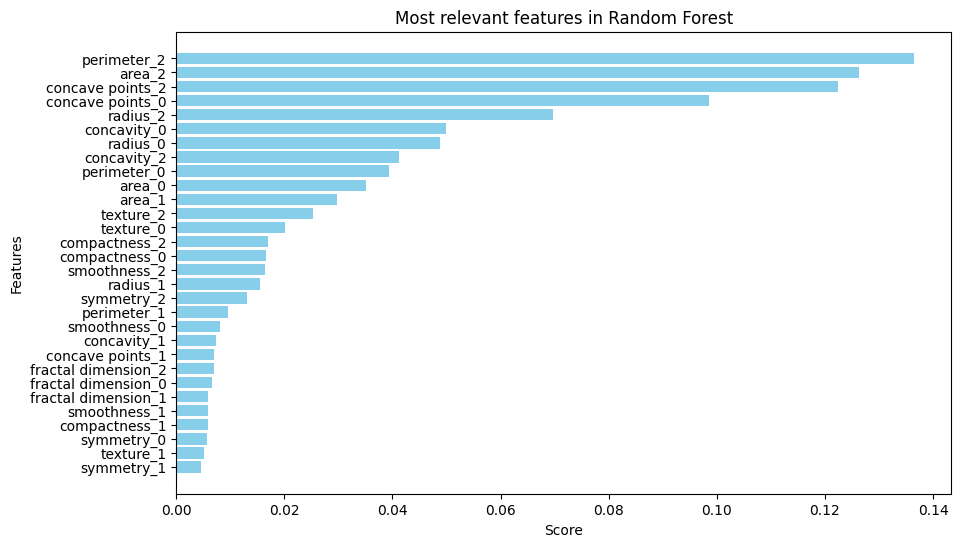

In [34]:
feature_importances = randomforest_model.feature_importances_
importance_df = pd.DataFrame({'Feature': patient_X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis() 
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Score")
plt.ylabel("Features")
plt.title("Most relevant features in Random Forest")
plt.show()

## Learned Rule Based Classifier

The final approach that we propose is using a Rule Based Classifier that directly learns from the data what are the best possible literal and cluases that must be used according to some metric such as accuracy or entropy. 

The 2 models that we propose are IREP and its improved version RIPPER.

In [35]:
import wittgenstein as lw

In [50]:
irep_clf = lw.IREP() 
irep_clf.fit(patient_X_train, patient_y_train)

y_pred = irep_clf.predict(patient_X_test)
accuracy, conf_matrix = evaluate_model(y_pred, patient_y_test, 'IREP MODEL')

prune_precision for rule [radius_0=>19.47] 1.0
prune_precision for rule [radius_0=17.1-19.47] 1.0
prune_precision for rule [radius_0=15.11-17.1] 0.9333333333333333
prune_precision for rule [concavepoints_2=0.15-0.18] 0.6666666666666666
prune_precision for rule [perimeter_2=106.16-116.44^radius_0=13.44-14.1] 1.0
prune_precision for rule [compactness_2=>0.45] None

Accuracy of IREP MODEL: 0.9824561403508771

Confusion Matrix for IREP MODEL:
[[39  1]
 [ 0 17]]

Classification Report for IREP MODEL:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.94      1.00      0.97        17

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



(0.9824561403508771,
 array([[39,  1],
        [ 0, 17]]))

In [51]:
irep_clf.out_model()

[[radius_0=>19.47] V
[radius_0=17.1-19.47] V
[radius_0=15.11-17.1] V
[concavepoints_2=0.15-0.18] V
[perimeter_2=106.16-116.44 ^ radius_0=13.44-14.1]]


In [46]:
ripper_clf = lw.RIPPER() 
ripper_clf.fit(patient_X_train, patient_y_train)

y_pred = ripper_clf.predict(patient_X_test)
accuracy, conf_matrix = evaluate_model(y_pred, patient_y_test, 'RIPPER MODEL')


Accuracy of RIPPER MODEL: 0.9824561403508771

Confusion Matrix for RIPPER MODEL:
[[39  1]
 [ 0 17]]

Classification Report for RIPPER MODEL:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.94      1.00      0.97        17

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



(0.9824561403508771,
 array([[39,  1],
        [ 0, 17]]))

In [47]:
ripper_clf.out_model()

[[area_1=>93.61] V
[area_1=54.09-93.61] V
[perimeter_2=116.44-135.5] V
[area_1=37.85-54.09 ^ radius_1=0.37-0.43] V
[smoothness_2=>0.162 ^ symmetry_2=>0.36] V
[perimeter_2=106.16-116.44 ^ perimeter_0=86.18-91.53] V
[compactness_2=0.37-0.45 ^ smoothness_0=0.0959-0.0993] V
[perimeter_2=135.5-154.18] V
[texture_0=22.34-24.98 ^ perimeter_2=106.16-116.44] V
[fractaldimension_0=<0.055 ^ radius_0=15.11-17.1]]


Both models perform very well, surpassing the performances of previous 2 approaches. Now we try to optimize further the IREP model with K-fold cross validation to determine the optimal hyperparameters.

In [90]:
irep = lw.IREP(verbosity=0)

param_grid = {
    "prune_size": [0.1, 0.2, 0.33, 0.5],
    "n_discretize_bins": [5, 10, 15, 20],
    "max_total_conds": [5],
}

grid_irep = GridSearchCV(estimator=irep, param_grid=param_grid)
grid_irep.fit(patient_X, patient_y)

prune_precision for rule [radius_2=>20.38] 1.0
prune_precision for rule [perimeter_2=105.98-134.14^symmetry_2=>0.32] 1.0
prune_precision for rule [perimeter_2=105.98-134.14] 1.0
prune_precision for rule [concavity_2=>0.42^concavepoints_2=>0.18] None
prune_precision for rule [perimeter_2=>135.5] 1.0
prune_precision for rule [perimeter_2=106.16-135.5^symmetry_2=>0.33] 1.0
prune_precision for rule [perimeter_2=106.16-135.5] 0.6666666666666666
prune_precision for rule [compactness_2=>0.37] 1.0
prune_precision for rule [concavepoints_2=>0.18] 1.0
prune_precision for rule [concavepoints_2=0.12-0.18] 0.7272727272727273
prune_precision for rule [perimeter_2=106.08-130.06^texture_0=>22.48] 0.0
prune_precision for rule [radius_2=>20.4] 1.0
prune_precision for rule [perimeter_2=106.08-132.98] 0.5
prune_precision for rule [concavity_2=>0.42^smoothness_2=>0.15] None
prune_precision for rule [radius_0=>17.17] 1.0
prune_precision for rule [compactness_2=>0.38] 1.0
prune_precision for rule [perimeter_

irep.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

base.py: .predict | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.



prune_precision for rule [concavepoints_2=>0.22] 1.0
prune_precision for rule [concavepoints_2=0.16-0.18] 1.0
prune_precision for rule [concavepoints_2=0.18-0.2] 1.0
prune_precision for rule [concavepoints_2=0.2-0.22] 1.0
prune_precision for rule [perimeter_2=125.5-135.5] 1.0
prune_precision for rule [concavepoints_2=0.2-0.23] 1.0
prune_precision for rule [concavepoints_2=0.16-0.18] 1.0
prune_precision for rule [concavepoints_2=0.18-0.2] 1.0
prune_precision for rule [concavepoints_2=>0.23] 1.0
prune_precision for rule [concavepoints_2=0.14-0.16] 1.0
prune_precision for rule [concavepoints_2=0.2-0.23] 1.0
prune_precision for rule [concavepoints_2=>0.23] None
prune_precision for rule [concavepoints_2=>0.22] 1.0
prune_precision for rule [concavity_0=0.15-0.18] 0.75
prune_precision for rule [radius_2=18.32-20.45] 1.0
prune_precision for rule [radius_2=20.45-22.64] None
prune_precision for rule [concavepoints_0=0.085-0.092] 1.0
prune_precision for rule [area_0=>1264.0] 1.0
prune_precision f

GridSearchCV(estimator=<IREP(max_rules=None, max_total_conds=None, verbosity=0, max_rule_conds=None, alpha=1.0, prune_size=0.33, random_state=None, n_discretize_bins=10)>,
             param_grid={'max_total_conds': [5],
                         'n_discretize_bins': [5, 10, 15, 20],
                         'prune_size': [0.1, 0.2, 0.33, 0.5]})

In [94]:
best_params = grid_irep.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_total_conds': 5, 'n_discretize_bins': 5, 'prune_size': 0.5}


In [95]:
y_pred = grid_irep.predict(patient_X_test)
accuracy, conf_matrix = evaluate_model(y_pred, patient_y_test, 'IREP MODEL')


Accuracy of IREP MODEL: 0.9824561403508771

Confusion Matrix for IREP MODEL:
[[40  0]
 [ 1 16]]

Classification Report for IREP MODEL:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.94      0.97        17

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



In [96]:
grid_irep.best_estimator_.out_model()

[[perimeter_0=>112.28] V
[perimeter_2=106.12-133.5] V
[compactness_2=>0.37 ^ concavepoints_2=>0.18]]


Optimizing the hyperparameters of the model, we obtain an impressive result since the model is able to almost perfectly discriminate among the samples of the 2 classes with only 1 error. Moreover it is able to determine a very simple and intuitive set of rules which enhance the interpretability of the model.